In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime

# Load the dataset from an online source (example URL)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'  # Replace with your dataset URL
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')  # Load data, parse 'Month' as dates, set as index
#parse_dates: parameter ensures that the 'Month' column is treated as a datetime type

# Preview the dataset
print(data.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


<ipython-input-30-4ae2a1a0d48d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Passengers'].resample('M').sum()


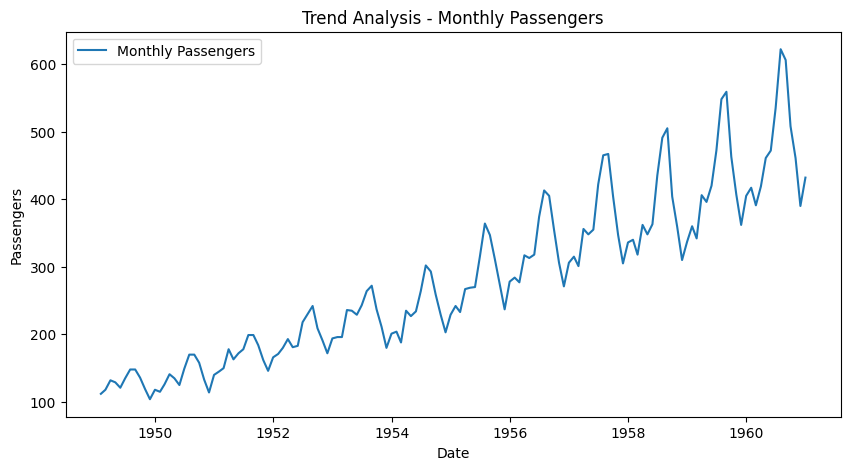

In [30]:
# Resample data to monthly frequency for trend analysis: This step aggregates data by month, which is useful for time series analysis.
monthly_data = data['Passengers'].resample('M').sum()

# 1. Trend Analysis
#What: The code plots the monthly sum of passengers to visualize the trend over time.
#Why: Trend analysis helps identify whether the overall number of passengers is increasing, decreasing, or remaining stable.
#This provides insight into the long-term behavior of the data.

plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Monthly Passengers')
plt.title('Trend Analysis - Monthly Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

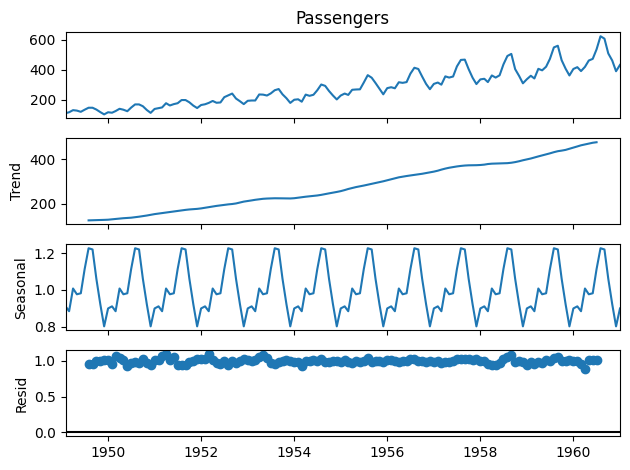

In [31]:
# 2. Seasonality Detection using Seasonal Decomposition
#What: The seasonal_decompose function breaks down the time series into trend, seasonal, and residual components.
#a. The trend component represents the long-term direction of the time series data, showing whether it is increasing, decreasing, or remaining stable over time.
#b. The seasonal component captures the repeating patterns or cycles in the data that occur at regular intervals (e.g., daily, monthly, or yearly).
#c. : The residual (or irregular/noise) component is what remains after removing the trend and seasonal components from the time series.
#It represents the random variation or noise that cannot be explained by the trend or seasonal pattern.

#Why: It helps identify repeating cycles or patterns (e.g., annual increases during holiday seasons) that can inform future
#predictions and business strategies.
decomposition = sm.tsa.seasonal_decompose(monthly_data, model='multiplicative')
decomposition.plot()
plt.show()

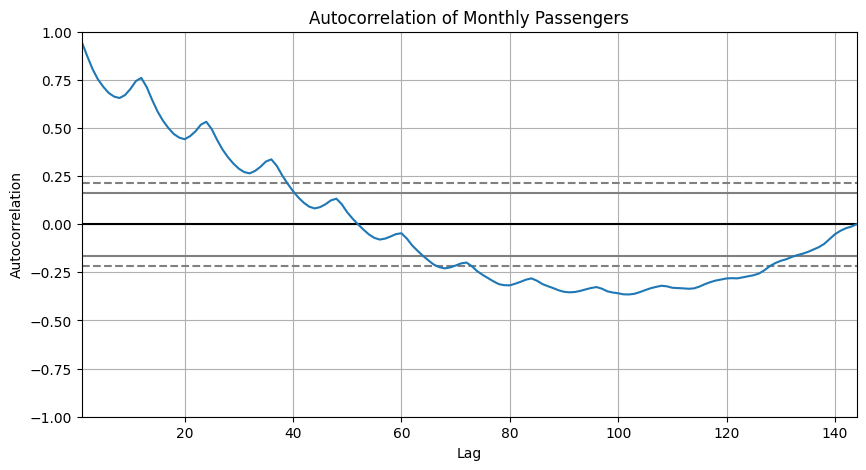

In [32]:
# 3. Temporal Relationships - Autocorrelation
#What: The autocorrelation plot shows the correlation between the time series values at different lags.
#Why: Understanding these temporal dependencies is crucial for building accurate predictive models, as it reveals how past values influence future outcomes.
plt.figure(figsize=(10, 5))
pd.plotting.autocorrelation_plot(monthly_data)
plt.title('Autocorrelation of Monthly Passengers')
plt.show()

In [33]:
#a. Time Lag Features
#A time lag feature refers to the value of a variable from a previous time step.
#For example, if we're predicting the number of passengers this month, we might use the number of passengers from last month or two months ago as
#features. In this case, we'll create a lag of 1 month and 2 months for the Passengers column.

# Create lag features: Passengers from the previous month and two months ago
data['Lag_1'] = data['Passengers'].shift(1)  # Shift by 1 month
data['Lag_2'] = data['Passengers'].shift(2)  # Shift by 2 months
#The Lag_1 column represents the passengers from the previous month.
#The Lag_2 column represents the passengers from two months ago.

# Display the updated DataFrame
data.head()

,Passengers,Lag_1,Lag_2
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,NaN
1949-03-01,132,118.0,112.0
1949-04-01,129,132.0,118.0
1949-05-01,121,129.0,132.0


In [ ]:
#b. Time Since Last Event
#Time since last event tracks how much time has passed since the last occurrence of a specific event.
#For simplicity, we can treat each month as a regular event. In this dataset, we will calculate the number of months that have passed since
#the number of passengers exceeded a threshold (say 130 passengers).

# Convert the 'Month' column to a datetime type for better handling if needed
data['Month'] = pd.to_datetime(data['Month'])

# Instead of subtracting the index directly, we'll subtract numeric values.
# Reset index to be a simple integer count if needed
data = data.reset_index()

# Now we can compute the difference from the previous events safely
data['Time_Since_Last_130'] = (data['Passengers'] > threshold).cumsum().shift(1)
data['Time_Since_Last_130'] = data.index - data['Time_Since_Last_130'].fillna(0).astype(int)

# Display the updated DataFrame
data.head()

In [38]:
#c. Time-Based Interaction
#Time-based interaction refers to creating new features by interacting different time-related variables. For instance, we could create a feature that multiplies the lagged values with the month index to capture a trend over time.# Create a time-based interaction feature: Multiply Lag_1 by the current month index
data['Interaction_Lag1_Month'] = data['Lag_1'] * data.index

# Display the updated DataFrame
data.head()

TypeError: cannot perform __rmul__ with this index type: DatetimeArray

**__VISUALIZING DATE AND TIME PATTERNS__**

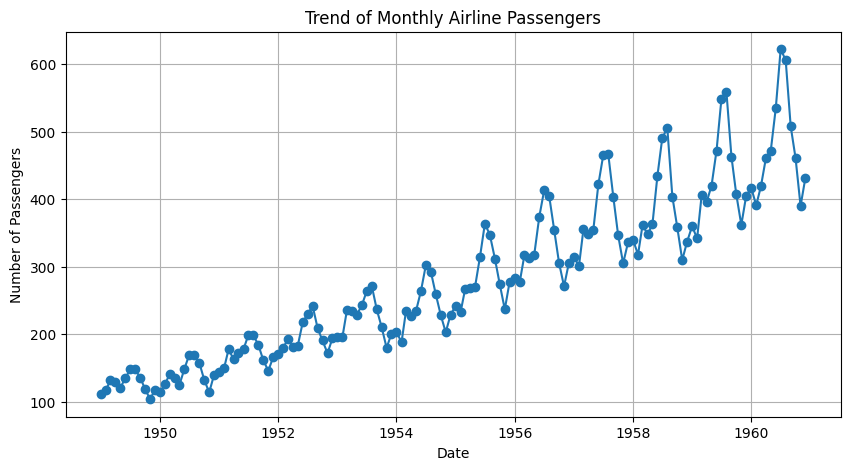

In [ ]:
# 1. Line Chart - A line chart is used here to visualize the overall trend and fluctuations in the dataset over time. It helps identify whether
#there is an increasing or decreasing trend, as well as any periodic fluctuations.
# e.g. Plotting a line chart to visualize the trend of passengers over time.

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Passengers'], marker='o')
plt.title('Trend of Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

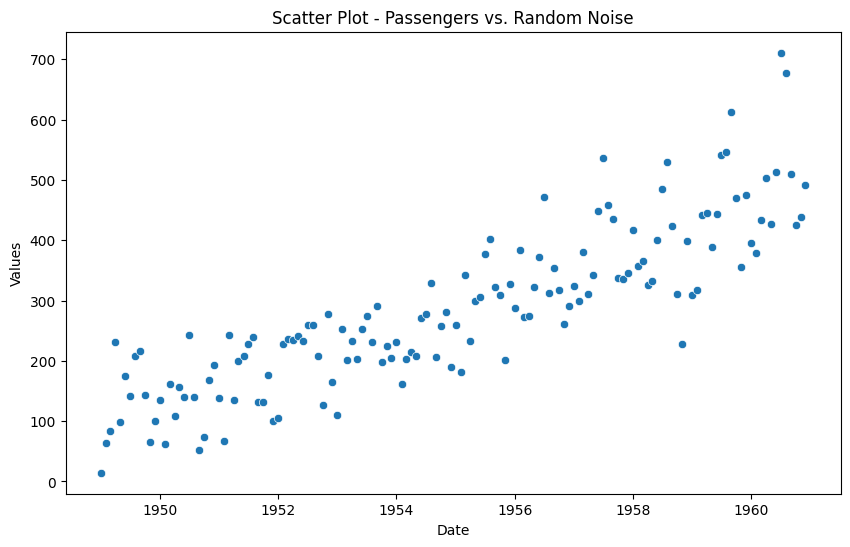

In [ ]:
# 2. Scatter Plot - used to identify relationships or correlations between time and other variables.
# This plot helps detect whether there's any correlation between the time dimension and the noise-added feature.
data['Random_Noise'] = data['Passengers'] + np.random.normal(scale=50, size=len(data))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['Random_Noise'])
plt.title('Scatter Plot - Passengers vs. Random Noise')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

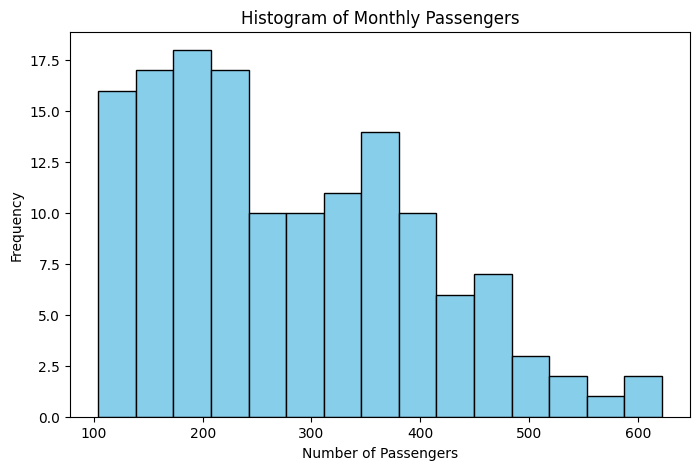

In [ ]:
# 3. Histogram - used to show the distribution of the number of passengers across the dataset.
# This helps understand the frequency of various ranges and whether the data is skewed or normally distributed
plt.figure(figsize=(8, 5))
plt.hist(data['Passengers'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

**__Extracting Date and Time Information​__**

In [ ]:
date = pd.read_csv('orders.csv')
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [ ]:
#Converting to datetime datatype
date['date'] = pd.to_datetime(date['date'])

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [ ]:
#Extract Year
date['date_year'] = date['date'].dt.year
date.head()

#Extract Month
date['date_month_no'] = date['date'].dt.month
date.head()

#Extract Month-Name
date['date_month_name'] = date['date'].dt.month_name()
date.head()

#Extract Day
date['date_day'] = date['date'].dt.day
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [ ]:
#Weekday, Weekend

#a.# day of week
date['date_dow'] = date['date'].dt.dayofweek
date.head()

#b. day of week - name
date['date_dow_name'] = date['date'].dt.day_name()
date.drop(columns=['product_id','city_id','orders']).head()

#b. is weekend?
date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)
date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,10,1,Tuesday,0
1,2018-08-15,2018,8,August,15,2,Wednesday,0
2,2018-10-23,2018,10,October,23,1,Tuesday,0
3,2019-08-17,2019,8,August,17,5,Saturday,1
4,2019-01-06,2019,1,January,6,6,Sunday,1


In [ ]:
import datetime

today = datetime.datetime.today()
today

datetime.datetime(2024, 10, 16, 15, 28, 20, 343562)

In [ ]:
today - date['date']

,date
0,1772 days 15:28:20.343562
1,2254 days 15:28:20.343562
2,2185 days 15:28:20.343562
3,1887 days 15:28:20.343562
4,2110 days 15:28:20.343562
...,...
995,2200 days 15:28:20.343562
996,2141 days 15:28:20.343562
997,1989 days 15:28:20.343562
998,2054 days 15:28:20.343562


In [ ]:
(today - date['date']).dt.days #used to calculate the number of days between the current date (today) and each date in the 'date' column

,date
0,1772
1,2254
2,2185
3,1887
4,2110
...,...
995,2200
996,2141
997,1989
998,2054


In [ ]:
time = pd.read_csv('messages.csv')
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [ ]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


In [ ]:
#Extracting time part
time['time'] = time['date'].dt.time
time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00
